In [1]:
## K-means clustering for Iris dataset
import seaborn as sns

iris = sns.load_dataset('iris')
iris_samples = iris.sample(n=75, replace=False, random_state=3)
X_iris = iris_samples.iloc[:, :4]
y_iris = iris_samples.species

In [2]:
iris_samples.head()

,sepal_length,sepal_width,petal_length,petal_width,species
47,4.6,3.2,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
31,5.4,3.4,1.5,0.4,setosa
25,5.0,3.0,1.6,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


In [3]:
from sklearn.cluster import KMeans
iris_model = KMeans(n_clusters=3)
iris_model.fit(X_iris)

## Predicting on samples
iris_labels = iris_model.predict(X_iris)
iris_labels

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1,
       0, 2, 2, 1, 2, 0, 1, 1, 2])

In [4]:
## Creating new samples
iris_new_samples = iris[~iris.index.isin(iris_samples.index)].copy()

X_iris_new = iris_new_samples.iloc[:,:4]
y_iris_new = iris_new_samples.species

iris_new_labels = iris_model.predict(X_iris_new)
iris_new_labels
print(X_iris_new)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
7             5.0          3.4           1.5          0.2
13            4.3          3.0           1.1          0.1
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[75 rows x 4 columns]


In [5]:
## Assigning lables
import pandas as pd
iris_new_samples['pred_labels'] = iris_new_labels
iris_samples['pred_labels'] = iris_labels

pred_labels = pd.concat([iris_new_samples[['species', 'pred_labels']], iris_samples[['species', 'pred_labels']]]).sort_index()
pred_labels

,species,pred_labels
0,setosa,1
1,setosa,1
2,setosa,1
3,setosa,1
4,setosa,1
...,...,...
145,virginica,2
146,virginica,0
147,virginica,2
148,virginica,2


Text(0.5, 1.0, 'New Sample')

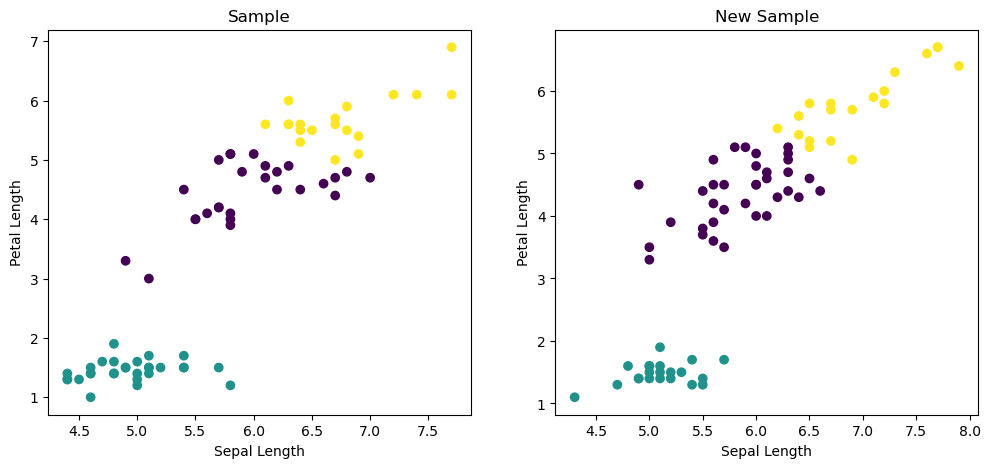

In [6]:
## Visualizing the iris dataset
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols =2, figsize=(12,5))

xs = X_iris.sepal_length
ys = X_iris.petal_length
xs_new = X_iris_new.sepal_length
ys_new = X_iris_new.petal_length

ax1.scatter(xs, ys, c=iris_labels)
ax1.set_ylabel('Petal Length')
ax1.set_xlabel('Sepal Length')
ax1.set_title('Sample')

ax2.scatter(xs_new, ys_new, c=iris_new_labels)
ax2.set_ylabel('Petal Length')
ax2.set_xlabel('Sepal Length')
ax2.set_title('New Sample')

In [7]:
## Penguins 
pen = sns.load_dataset('penguins').dropna()
pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [8]:
points = pen.iloc[:,2:4]
points

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


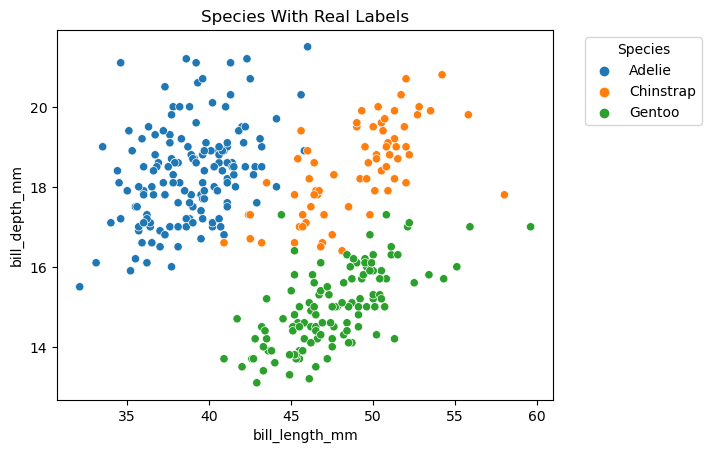

In [9]:
xs = points.bill_length_mm
ys = points.bill_depth_mm

sns.scatterplot(x=xs, y=ys, hue=pen.species)
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Species With Real Labels')
plt.show()

## Clustering 2D points

In [10]:
# create points

points = pen.iloc[:,2:4].sample(n=177, random_state =3)
new_points = pen[~pen.index.isin(points.index)].iloc[:,2:4]

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# fit the model
model.fit(points)

labels = model.predict(points)

# Determine the cluster labels of new_points: labels
new_labels = model.predict(new_points)

# Print cluster labels of new_points
print(new_labels)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 2 0 0 0
 0 2 0 0 0 2 1 2 2 2 0 2 0 0 0 0 2 2 2 0 2 0 0 0 0 2 2 2 2 2 2 0 2 2 2 0 0
 2 0 2 2 2 2 0 2 0 2 0 2 2 2 0 2 2 2 0 2 0 0 0 2 2 2 2 2 0 0 0 2 0 0 0 0 0
 2 0 2 2 2 0 2 0]


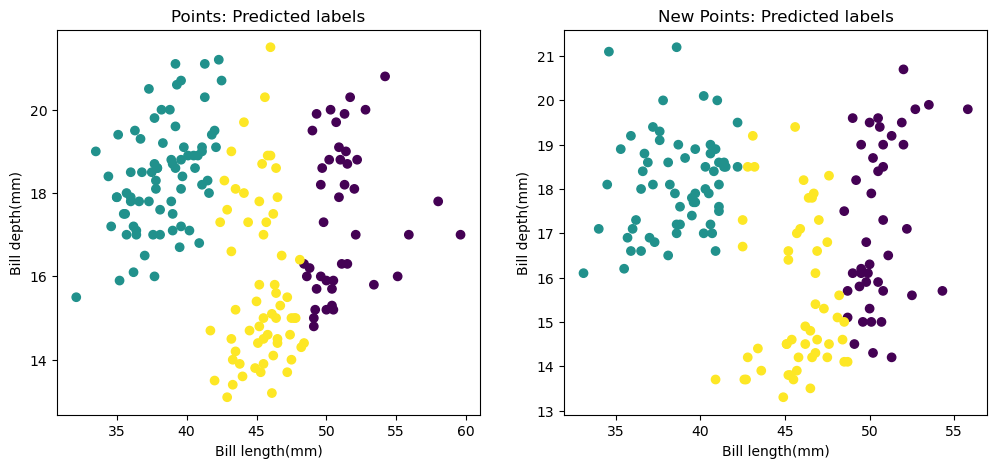

In [11]:
## Visualizing the penguin species

fig, (ax1,ax2) = plt.subplots(nrows =1, ncols = 2, figsize=(12,5))
xs = points.bill_length_mm
ys = points.bill_depth_mm
xs_new = new_points.bill_length_mm
ys_new = new_points.bill_depth_mm

ax1.scatter(xs, ys, c= labels)
ax1.set_xlabel('Bill length(mm)')
ax1.set_ylabel('Bill depth(mm)')
ax1.set_title('Points: Predicted labels')

ax2.scatter(xs_new, ys_new, c=new_labels)
ax2.set_xlabel('Bill length(mm)')
ax2.set_ylabel('Bill depth(mm)')
ax2.set_title('New Points: Predicted labels')
plt.show()

## Inspect your clustering


In [12]:
import numpy as np

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=new_labels, alpha =0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker ='D', s = 50)

InvalidIndexError: (slice(None, None, None), 0)

## Evaluating a Clustering

In [ ]:
ct = pd.crosstab(pred_labels.pred_labels, pred_labels.species)
ct

In [ ]:
iris_model.inertia_

In [ ]:
sum_of_squared_distances = list()

K = range(1,10)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X_iris)
    sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal K')
plt.grid()
plt.show()

## How many clusters of grain?

In [ ]:
seeds = pd.read_csv('Downloads/seeds.csv', header = None)
samples = seeds.iloc[:,:-1].values


In [ ]:
ks = range(1,6)
inertias = list()

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    model.fit(samples)
    
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.xticks(ks)
plt.show()
    

## Evaluating the grain clustering

In [ ]:
varities = list(seeds.iloc[:,-1].map({1:'Kama Wheat', 2:'Rosa Wheat',3:'Canadian Wheat'}))

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels':labels, 'varities': varities})

# Create crosstab: ct
ct = pd.crosstab(df.labels,df.varities)
ct

## Transforming features for better clusterings

In [ ]:
samples = pd.read_csv('Downloads/wine.csv', header = 0).iloc[:,2:].values
varieties = pd.read_csv('Downloads/wine.csv', header = 0).iloc[:,1]
varieties.head()

In [ ]:
## Clustering the samples
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
labels = model.fit_predict(samples)
labels

In [ ]:
# Clusters vs. varieties
df = pd.DataFrame({'labels':labels, 'varieties':varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

In [ ]:
# Feature variances
var = pd.read_csv('Downloads/wine.csv', header = 0).iloc[:,1:]
var.var()

In [ ]:
# Pipelines sklearn StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

In [ ]:
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels':labels,'varieties':varieties})
ct = pd.crosstab(df['labels'],df['varieties'])
ct

### Scaling fish data for clustering

In [ ]:
data = pd.read_csv('Downloads/fish.csv',header = None).dropna()
species = list(data[0].map({1:'Bream',2:'Whitewish',3:'Roach',4:'?',5:'Smelt',6:'Pike',7:'Perch'}))
samples = data.iloc[:,1:].values
## species = data.iloc[0]

In [ ]:
data.head()

In [ ]:
# Clustering without scaling

# Create a KMeans model with 4 clusters: model
model = KMeans(n_clusters=4)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'species': species}).reset_index()

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)

In [ ]:
# Scaling fish data for clustering

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

In [ ]:
# Clustering the fish data

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)

## Stocks data

In [ ]:
data = pd.read_csv('Downloads/company-stock-movements-2010-2015-incl.csv')
data.head()

In [ ]:
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

# Clustering stocks using KMeans

# Import Normalizer
from sklearn.preprocessing import Normalizer
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

In [ ]:
# Which stocks move together?

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels':labels, 'movements':movements})

# Display df sorted by cluster label
df.sort_values(by='labels')[:15]

# Chap 2: Visualization with hierarchical clustering and t-SNE

### Visualizing hierarchies

In [ ]:
score_df = pd.read_csv('Downloads/eurovision-2016.csv')
country_names = list(scores_df.index)
samples = scores_df.iloc[:,1:]
samples.fillna(value=0).values

In [ ]:
# Hierarchical clustering with SciPy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(samples, method = 'complete')

dendrogram(mergings, labels = country_names, leaf_rotation = 90, leaf_font_size = 6, truncate_mode = 'lastp', p=30)

plt.title("Countries hierarchically clustered by Eurovision 2016 voting")
plt.show()

In [ ]:
score_df.head()

In [ ]:
# Grain/Seed dataset
data = pd.read_csv('Downloads/seeds.csv',header =None)[::3]
samples = data.iloc[:,:-1].values
varieties = list(data.iloc[:,-1].map({1:'Kama wheat',2:'Rosa wheat', 3:'Canadian wheat'}))

In [ ]:
data.head()

In [ ]:
# Hierarchical clustering of the grain data

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# calculate the linkage:mergings
mergings = linkage(samples, method = 'complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings, labels = varieties, leaf_rotation=90, leaf_font_size=6)

plt.show()

In [ ]:
## Stocks data

data = pd.read_csv('Downloads/company-stock-movements-2010-2015-incl.csv')
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

In [ ]:
# Hierarchies of stocks

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')

# Plot the dendrogram
dendrogram(mergings, labels = companies, leaf_rotation =90, leaf_font_size = 6)
plt.show()

## Extracting the cluster labels

In [ ]:
# Eurovision scoring datasetse

scores_df = pd.read_csv("Downloads/eurovision-2016.csv",index_col=0)
country_names = list(scores_df.index)
samples = scores_df.fillna(value=0).values
samples

In [ ]:
# Extracting cluster labels using fcluster

from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')

from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')
print(labels)

In [ ]:
## Grain data set


data = pd.read_csv("Downloads/seeds.csv",header=None)[::3]
samples = data.iloc[:,:-1].values
varieties = list(data.iloc[:,-1].map({1:'Kama wheat',2:'Rosa wheat',3:'Canadian wheat'}))

mergings = linkage(samples,method='complete')

In [ ]:
# Extracting the cluster labels

# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion = 'distance')
print(labels)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])
ct

In [ ]:
# Plot the dendrogram
dendrogram(mergings, labels = varieties, leaf_rotation =90, leaf_font_size =6)
plt.show()

## t-SNE for 2-dimensional maps

In [ ]:
# Iris dataset

import seaborn as sns

iris = sns.load_dataset('iris')
iris_samples = iris.sample(n=75, replace=False, random_state=3)
species = iris['species']
iris

In [ ]:
rs = [100, 200, 300]
fig, axes = plt.subplots(ncols=3, figsize=(15, 3))
axes = axes.ravel()

for i, state in enumerate(rs):
    ax = axes[i]
    
    model = TSNE(learning_rate=100, random_state=state)
    transformed = model.fit_transform(iris.iloc[:, :4])

    xs = transformed[:, 0]
    ys = transformed[:, 1]

    sns.scatterplot(x=xs, y=ys, hue=iris.species, ax=ax)
    ax.set_title(f't-SNE applied to Iris with random_state={state}')
    
plt.tight_layout()
plt.show()

In [ ]:
## Grqin dataset

data = pd.read_csv('Downloads/seeds.csv',header =None)[::3]
samples = data.iloc[:,:-1].values
varieties = list(data.iloc[:,-1])

In [ ]:
# t-SNE visualization of grain dataset

from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate =100)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]
ys = tsne_features[:,1]

# Scatter plot, coloring by varieties
plt.scatter(xs, ys, c = varieties)
plt.show()

In [ ]:
## Stocks data

data = pd.read_csv('Downloads/company-stock-movements-2010-2015-incl.csv')
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

normalized_movements = normalize(movements)

# A t-SNE map of the stock market

# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x,y), fontsize = 7, alpha=1)
plt.show()

# Chap 3: Decorrelating your data and dimension reduction

## Visualizing the PCA transformation

In [ ]:
# Piedmont wines dataset
import pandas as pd

samples = pd.read_csv("Downloads/wine.csv",header = 0)
samples = samples.iloc[:,[7,13]].values
varieties = pd.read_csv("Downloads/wine.csv",header = 0).iloc[:,0]
varieties

In [ ]:
# Plot non-transformed features
import matplotlib.pyplot as plt
plt.scatter(samples[:,0], samples[:,1], c=varieties, s=10)
plt.xlim(-4,6)
plt.ylim(-4,6)
# Draw lines to split quadrants
plt.plot([0,0],[-4,6], linewidth = 1, color ='black')
plt.plot([-4,6],[0,0], linewidth = 1, color = 'black')
plt.title('total_phenols_vs_od280')

In [ ]:
# Using scikit-learn PCA

from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
transformed = model.transform(samples)
print(transformed[:3])

In [ ]:
# Plot transformed features
plt.scatter(transformed[:,0], transformed[:,1], c = varieties, s=10)
plt.xlim(-4,6)
plt.ylim(-4,6)
# Draw lines to split quadrants
plt.plot([0,0],[-4,6], linewidth = 1, color ='black')
plt.plot([-4,6],[0,0], linewidth = 1, color = 'black')
plt.title('total_phenols_vs_od280')

In [ ]:
# Principal components
print(model.components_)

In [ ]:
# Grain/Seed dataset
grains = pd.read_csv('Downloads/seeds.csv', header =None, usecols =[3,4]).values


In [ ]:
# Correlated data in nature

# Perform the necessary imports
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length, s=10)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)
print(correlation, pvalue)

In [ ]:
# Decorrelating the grain measurements with PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs,ys, s=10)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, p_value = pearsonr(xs,ys)

print(correlation, p_value)

## Intrinsic dimension

In [ ]:
iris = pd.read_csv('Downloads/Iris.csv')
versicolor = iris[iris['Species']=='versicolor']
x = versicolor['SepalLengthCm']
y = versicolor['SepalWidthCm']
z = versicolor['PetalWidthCm']

In [ ]:
# 3D scatter plot of Versicolor dataset

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(x,y,z,cmap = 'viridis', linewidth =0.5, c= 'red')

In [ ]:
# PCA of the versicolor samples
samples = versicolor.iloc[:,[0,1,3]].values
pca =PCA()
pca.fit(samples)

In [ ]:
# Grain/Seed dataset
import pandas as pd
grains = pd.read_csv('Downloads/seeds.csv', header =None, usecols =[3,4]).values


In [ ]:
# The first principal component

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1], c='blue', s=10)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0],mean[1], first_pc[0], first_pc[1], color ='red', width=0.01)
# Keep axes on same scale
plt.axis('equal')
plt.show()

In [ ]:
# Fish dataset

data = pd.read_csv("Downloads/fish.csv",header=None).dropna()
species = list(data[0].map({1:'Bream',2:'Whitewish',3:'Roach',4:'?',5:'Smelt',6:'Pike',7:'Perch'}))
samples = data.iloc[:,1:].values

In [ ]:
# Variance of the PCA features

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# create a pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## Dimension reduction with PCA

In [ ]:
iris = pd.read_csv('Downloads/Iris.csv')

species = iris.Species
samples = iris.iloc[:,0:5].values


In [ ]:
# Dimension reduction of iris dataset
import seaborn as sns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)
transformed = pca.transform(samples)
print(transformed.shape)

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c = 'blue', s=10)
plt.show()

In [ ]:
## Dimension reduction of the fish measurements

data = pd.read_csv("Downloads/fish.csv",header=None).dropna()
species = list(data[0].map({1:'Bream',2:'Whitewish',3:'Roach',4:'?',5:'Smelt',6:'Pike',7:'Perch'}))
samples = data.iloc[:,1:].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

In [ ]:
# Dimension reduction of the fish measurements

# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

## TruncatedSVD and csr_matrix

In [ ]:
wiki = pd.read_csv('Downloads/wikipedia-vectors.csv', index_col=0)
print(wiki.shape)
from scipy.sparse import csr_matrix

articles = csr_matrix(wiki.transpose())
titles = list(wiki.columns)


In [ ]:
# from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=3)
model.fit(articles)
TruncatedSVD(algorithm ='randomized')
transformed = model.transform(articles)
transformed.shape


In [ ]:
transformed[:3,:]

## A tf-idf word-frequency array

In [ ]:
# TF-IDF toy collection of documents
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [ ]:
# A tf-idf word-frequency array

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()

print(words)

## Clustering Wikipedia part I

In [16]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

wiki = pd.read_csv('Downloads/wikipedia-vectors.csv', index_col=0)
print(wiki.shape)
articles = csr_matrix(wiki.transpose())
titles = list(wiki.columns)

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

(13125, 60)


## Clustering Wikipedia part II

In [17]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)


# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article':titles})

print(df.sort_values('label'))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    label                                        article
59      0                                    Adam Levine
50      0                                   Chad Kroeger
51      0                                     Nate Ruess
52      0                                     The Wanted
53      0                                   Stevie Nicks
58      0                                         Sepsis
55      0                                  Black Sabbath
56      0                                       Skrillex
57      0                          Red Hot Chili Peppers
54      0                                 Arctic Monkeys
19      1  2007 United Nations Climate Change Conference
18      1  2010 United Nations Climate Change Conference
16      1                                        350.org
15      1                                 Kyoto Protocol
17      1  Greenhouse gas emissions by the United States
13      1                               Connie Hedegaard
12      1                      

# Chap 4: Discovering interpretable features
## Non-negative matrix factorization ("NMF")

In [13]:
# Word-frequency array sample

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: samples
samples = tfidf.fit_transform(documents)

# Print result of toarray() method
print(samples.toarray())

words = tfidf.get_feature_names_out()
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


In [14]:
# Example usage of NMF

from sklearn.decomposition import NMF
model = NMF(n_components=2)
model.fit(samples)

nmf_features = model.transform(samples)
print(model.components_)
print(nmf_features)
print(samples[1:,])

[[5.07156785e-01 0.00000000e+00 5.07299482e-01 6.66929994e-01
  1.01457760e+00 6.67117617e-01]
 [5.86925227e-01 7.71689974e-01 5.86855023e-01 4.61618718e-05
  9.87338634e-09 0.00000000e+00]]
[[5.10368218e-01 7.66024956e-05]
 [5.10469814e-01 0.00000000e+00]
 [0.00000000e+00 8.82373201e-01]]
  (0, 2)	0.5178561161676974
  (0, 4)	0.5178561161676974
  (0, 5)	0.680918560398684
  (1, 0)	0.5178561161676974
  (1, 1)	0.680918560398684
  (1, 2)	0.5178561161676974


# NMF applied to Wikipedia articles

from sklearn.decomposition i

In [18]:
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
nmf_features= model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features[:10])

[[0.         0.         0.         0.         0.         0.43871873]
 [0.         0.         0.         0.         0.         0.56436595]
 [0.00377674 0.         0.         0.         0.         0.39706521]
 [0.         0.         0.         0.         0.         0.38022508]
 [0.         0.         0.         0.         0.         0.483604  ]
 [0.01278374 0.01371649 0.00772587 0.03321251 0.         0.33320251]
 [0.         0.         0.02057133 0.         0.00601723 0.35763468]
 [0.         0.         0.         0.         0.         0.48904269]
 [0.01525083 0.01420351 0.00374804 0.02354919 0.02613966 0.47886883]
 [0.01104957 0.03119952 0.03079614 0.06524354 0.01957501 0.33695502]]


In [19]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index = titles)
# Print the row for 'Anne Hathaway'
print(df.loc['Angelina Jolie'])
# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.000000
1    0.011352
2    0.020763
3    0.514246
4    0.057870
5    0.013736
Name: Angelina Jolie, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419510
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


## NMF learns interpretable parts

In [21]:
# Visualizing samples

samples = np.array([0., 1., 0.5, 1., 0., 1.])
bitmap = samples.reshape((2,3))
print(bitmap)

[[0.  1.  0.5]
 [1.  0.  1. ]]


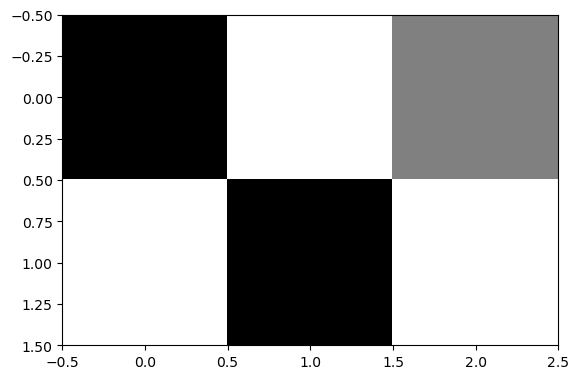

In [22]:
from matplotlib import pyplot as plt

plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()

In [33]:
# datasets required
# NMF model created above

f = open('Downloads/wikipedia-vocabulary-utf8.txt', 'r', encoding='utf-8')
words =f.read().split('\n')
words

['aaron',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abbas',
 'abbey',
 'abbreviated',
 'abbreviation',
 'abc',
 'abdomen',
 'abdominal',
 'abdul',
 'abel',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormalities',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'aboriginal',
 'abortion',
 'abraham',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'absorption',
 'abstract',
 'abstraction',
 'absurd',
 'abu',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'academia',
 'academic',
 'academics',
 'academies',
 'academy',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accession',
 'accessories',
 'accessory',
 'accident',
 'accidental',
 'accidenta

In [32]:
model = NMF(n_components=6)

nmf_features = model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# NMF learns topics of documents
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

print(component.nlargest())

(6, 13125)
film       0.632075
award      0.254822
starred    0.246924
role       0.212865
actress    0.187643
Name: 3, dtype: float64


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


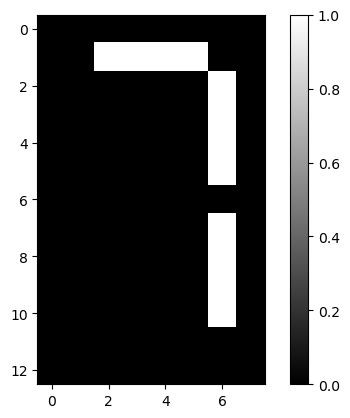

In [38]:
# Digits dataset
samples = pd.read_csv("Downloads/lcd-digits.csv", header=None).values

digit = samples[0,:]
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [39]:
## Create a function
def show_as_image(sample):
    bitmap=samples.reshape(13,8)
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [40]:
# NMF learns the parts of images

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

ValueError: cannot reshape array of size 10400 into shape (13,8)

# Building recommender systems using NMF

In [45]:
# Finding similar articles
nmf = NMF(n_components = 6)
nmf_features = nmf.fit_transform(articles)
# Calculating the cosine similarities
from sklearn.preprocessing import normalize

norm_features = normalize(nmf_features)
current_article = norm_features[23,:]
similarities = norm_features.dot(current_article)
print(similarities)
print(current_article)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.89714946e-02 0.00000000e+00 0.00000000e+00
 4.90079958e-02 1.88150840e-01 0.00000000e+00 0.00000000e+00
 1.90635833e-01 3.22542451e-02 0.00000000e+00 0.00000000e+00
 8.57874071e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.92339509e-01 1.00000000e+00 9.99911450e-01 1.00000000e+00
 1.00000000e+00 9.45688644e-01 9.99921416e-01 9.99047804e-01
 9.99977281e-01 9.99323330e-01 0.00000000e+00 1.02520204e-02
 7.01524763e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.07942043e-01 5.18914177e-02 3.64566288e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.03934725e-02
 1.08225674e-03 0.00000000e+00 0.00000000e+00 9.99172273e-04
 3.11383435e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.26474235e-02 9.89404438e-02 0.00000000e+00 0.00000000e+00
 1.89039639e-01 0.00000000e+00 3.02488890e-02 2.52741712e-01]
[0. 0. 0. 1. 0. 0.]


In [47]:
# DataFrames and labels
df = pd.DataFrame(norm_features, index=titles)
current_article = df.loc['Catherine Zeta-Jones']
similarities = df.dot(current_article)
print(similarities.nlargest())

Michael Fassbender      1.000000
Catherine Zeta-Jones    1.000000
Jessica Biel            1.000000
Anne Hathaway           0.999977
Mila Kunis              0.999921
dtype: float64


In [48]:
# Which articles arerr similar to 'Cristiano Ronaldo'?
current_article = df.loc['Cristiano Ronaldo']
similarities = df.dot(current_article)
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


In [56]:
# Musical Artists Dataset
music = pd.read_csv('Downloads/scrobbler-small-sample.csv')
df = music.pivot_table(values='playcount', index='artist_offset',columns='user_offset',aggfunc =sum,fill_value=0.)
df = df.astype('float')
artists = csr_matrix(df)
artist_names = list(pd.read_csv('Downloads/artists.csv',header =None)[0])
artist_names

['Massive Attack',
 'Sublime',
 'Beastie Boys',
 'Neil Young',
 'Dead Kennedys',
 'Orbital',
 'Miles Davis',
 'Leonard Cohen',
 'Van Morrison',
 'NOFX',
 'Rancid',
 'Lamb',
 'Korn',
 'Dropkick Murphys',
 'Bob Dylan',
 'Eminem',
 'Nirvana',
 'Van Halen',
 'Damien Rice',
 'Elvis Costello',
 'Everclear',
 'Jimi Hendrix',
 'PJ Harvey',
 'Red Hot Chili Peppers',
 'Ryan Adams',
 'Soundgarden',
 'The White Stripes',
 'Madonna',
 'Eric Clapton',
 'Bob Marley',
 'Dr. Dre',
 'The Flaming Lips',
 'Tom Waits',
 'Moby',
 'Cypress Hill',
 'Garbage',
 'Fear Factory',
 '50 Cent',
 'Ani DiFranco',
 'Matchbox Twenty',
 'The Police',
 'Eagles',
 'Phish',
 'Stone Temple Pilots',
 'Black Sabbath',
 'Britney Spears',
 'Fatboy Slim',
 'System of a Down',
 'Simon & Garfunkel',
 'Snoop Dogg',
 'Aimee Mann',
 'Less Than Jake',
 'Rammstein',
 'Reel Big Fish',
 'The Prodigy',
 'Pantera',
 'Foo Fighters',
 'The Beatles',
 'Incubus',
 'Audioslave',
 'Bright Eyes',
 'Machine Head',
 'AC/DC',
 'Dire Straits',
 'Motör

In [65]:
# Recommend musical artists part I
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components = 20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)



In [66]:
# Recommend musical artists part II
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest)

<bound method Series.nlargest of Massive Attack           0.032193
Sublime                  0.000000
Beastie Boys             0.105158
Neil Young               0.953432
Dead Kennedys            0.098160
                           ...   
Franz Ferdinand          0.057530
The Postal Service       0.000000
The Dresden Dolls        0.016941
The Killers              0.029045
Death From Above 1979    0.000001
Length: 111, dtype: float64>
